In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
df=pd.read_csv('D:\ML\Customer_Churn_Predictor\Customer_Churn\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking for null in columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#retirving columns with object data and numerical data
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
print(numerical_cols)
print(categorical_cols)
print(bool_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
[]


In [13]:
#making all the changes ina copy
df_copy=df.copy()


In [14]:
#using encoding
for col in df_copy.columns:
    if df_copy[col].dtype == "object":
        print(f"{col}: {df_copy[col].unique()}")


customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [17]:
df_copy.isna().sum()



customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# Step 1: Strip spaces
df_copy["TotalCharges"] = df_copy["TotalCharges"].str.strip()

# Step 2: Convert to NaN if conversion fails (for empty strings)
df_copy["TotalCharges"] = pd.to_numeric(df_copy["TotalCharges"], errors='coerce')

# Step 3: Fill missing values (NaN) with median
df_copy["TotalCharges"].fillna(df_copy["TotalCharges"].median(), inplace=True)

# Step 4: Confirm conversion
print(df_copy["TotalCharges"].dtype)  # should be float64

float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10036\1581525790.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["TotalCharges"].fillna(df_copy["TotalCharges"].median(), inplace=True)


In [24]:
print(df_copy['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [25]:

df_copy["TotalCharges"] = df_copy["TotalCharges"].astype(float)

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df_copy.drop(columns=['customerID'],axis=1,inplace=True)

# Columns
OHE_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
            'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod','Churn']
Ordinal_cols = ['Contract']
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges']

# One-Hot Encoding
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
encoded_ohe = ohe.fit_transform(df_copy[OHE_cols])
ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(OHE_cols), index=df_copy.index)

# Ordinal Encoding
ord_encoder = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
encoded_ord = ord_encoder.fit_transform(df_copy[Ordinal_cols])
ord_df = pd.DataFrame(encoded_ord, columns=['Contract_encoded'], index=df_copy.index)

# Drop original encoded columns
df_copy.drop(columns=OHE_cols + Ordinal_cols, inplace=True)

# Concatenate all
df_copy = pd.concat([df_copy, ohe_df, ord_df], axis=1)


In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

<Axes: >

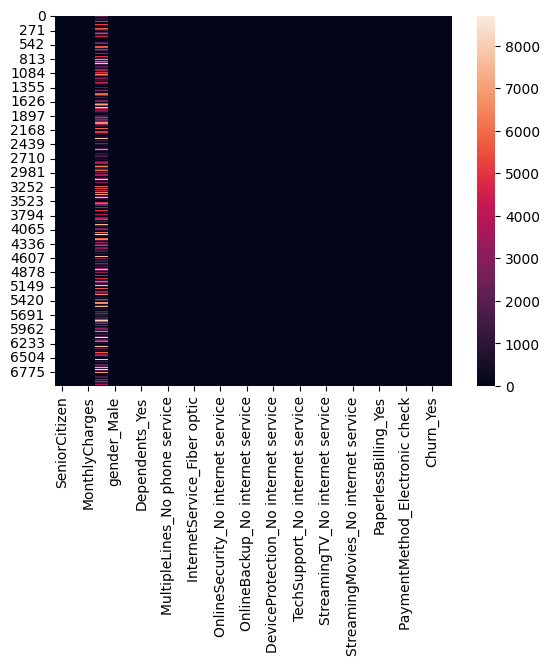

In [28]:
sns.heatmap(df_copy)

In [30]:
df_copy.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Contract_encoded
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,-0.001874,0.016479,-0.211185,0.008576,-0.008576,0.142948,...,-0.182742,0.105378,-0.182742,0.120176,0.156530,-0.024135,0.171718,-0.153477,0.150889,-0.142554
tenure,0.016567,1.000000,0.247900,0.825464,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,...,-0.039062,0.279756,-0.039062,0.286111,0.006152,0.233006,-0.208363,-0.233852,-0.352229,0.671607
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,...,-0.763557,0.629603,-0.763557,0.627429,0.352150,0.030550,0.271625,-0.377437,0.193356,-0.074195
TotalCharges,0.102652,0.825464,0.650864,1.000000,-0.000002,0.318364,0.063593,0.113013,-0.113013,0.468705,...,-0.374706,0.515279,-0.374706,0.519884,0.158055,0.182745,-0.059971,-0.294814,-0.199037,0.448564
gender_Male,-0.001874,0.005106,-0.014569,-0.000002,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,...,0.006026,-0.008393,0.006026,-0.010487,-0.011754,0.001215,0.000752,0.013744,-0.008612,0.000126
Partner_Yes,0.016479,0.379697,0.096848,0.318364,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,...,0.000615,0.124666,0.000615,0.117412,-0.014877,0.082029,-0.083852,-0.095125,-0.150448,0.294806
Dependents_Yes,-0.211185,0.159712,-0.113890,0.063593,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,...,0.139812,-0.016558,0.139812,-0.039741,-0.111377,0.060267,-0.150642,0.059071,-0.164221,0.243187
PhoneService_Yes,0.008576,0.008448,0.247398,0.113013,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,...,0.172209,-0.022574,0.172209,-0.032959,0.016505,-0.007721,0.003062,-0.003319,0.011942,0.002247
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113013,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,...,-0.172209,0.022574,-0.172209,0.032959,-0.016505,0.007721,-0.003062,0.003319,-0.011942,-0.002247
MultipleLines_Yes,0.142948,0.331941,0.490434,0.468705,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,...,-0.210564,0.257152,-0.210564,0.258751,0.163530,0.060048,0.083618,-0.227206,0.040102,0.107114


In [31]:
#checking columns with corr>.90\
import pandas as pd

# Compute the correlation matrix (absolute value for positive/negative correlation)
corr_matrix = df.corr(numeric_only=True).abs()

# Select upper triangle of the correlation matrix (to avoid duplicates and self-correlation)
upper = corr_matrix.where(
    pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool), 
                 columns=corr_matrix.columns, index=corr_matrix.index)
)

# Find features with correlation > 0.9
high_corr_pairs = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated columns (corr > 0.9):")
print(high_corr_pairs)


Highly correlated columns (corr > 0.9):
[]
